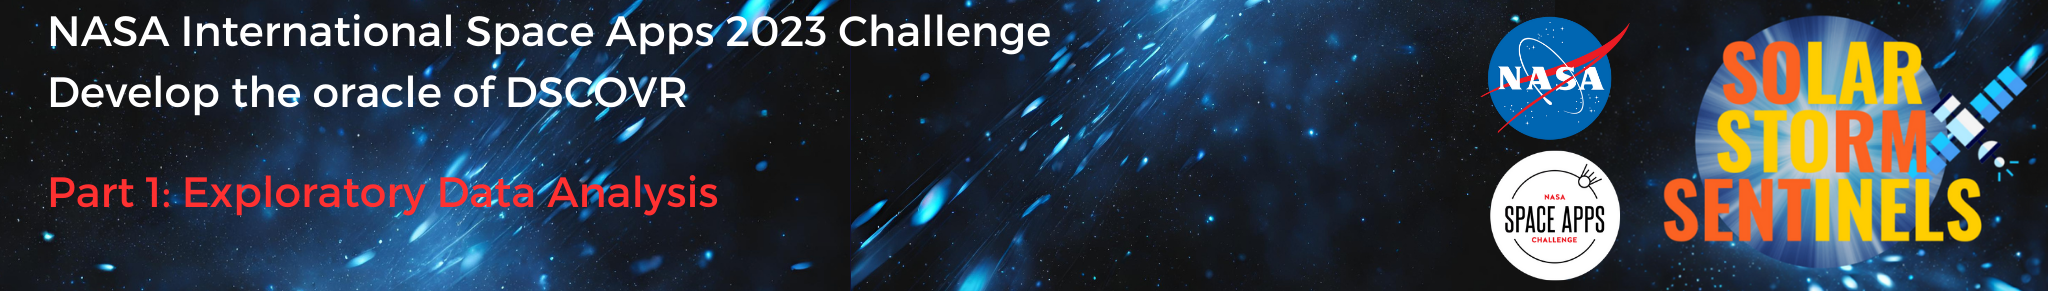

In [2]:
from IPython.display import Image
Image(filename='graphic_design/NASA_Part1.png')

# Annex: Solar Flux Data 

Data obtained from the Canada Space Administration Database. It has been transformed with the intention of using it as additional features in an extended dataset to feed into the models developed.

https://www.spaceweather.gc.ca/forecast-prevision/solar-solaire/solarflux/sx-en.php


In [3]:
#TOC

# 0. Environment Setup

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [204]:
#We bring the data
solarflux_df = pd.read_excel('Raw_data/solarflux_data.xlsx')

# 1. Dataset Analysis

In [205]:
solarflux_df.head()

,Date,Time,Julian day,Carrington rotation,Observed Flux,Adjusted Flux,URSI Flux
0,2023-01-01,20:00:00,2459946.322,2266.019,152.6,147.5,132.8
1,2023-01-01,22:00:00,2459946.406,2266.022,151.5,146.5,131.8
2,2023-01-02,18:00:00,2459947.239,2266.052,148.3,143.4,129.0
3,2023-01-02,20:00:00,2459947.322,2266.055,146.4,141.5,127.4
4,2023-01-02,22:00:00,2459947.406,2266.059,145.5,140.7,126.6


In [206]:
#We will start by ordering the values
solarflux_df = solarflux_df.sort_values(by=['Date', 'Time'])

In [207]:
solarflux_df.head()

,Date,Time,Julian day,Carrington rotation,Observed Flux,Adjusted Flux,URSI Flux
6963,2016-01-01,18:00:00,2457389.239,2172.268,98.4,95.1,85.6
6964,2016-01-01,20:00:00,2457389.322,2172.271,98.4,95.1,85.6
6965,2016-01-01,22:00:00,2457389.406,2172.274,97.5,94.3,84.9
6966,2016-01-02,18:00:00,2457390.239,2172.304,101.0,97.6,87.8
6967,2016-01-02,20:00:00,2457390.322,2172.307,100.0,96.6,87.0


In [208]:
solarflux_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8061 entries, 6963 to 369
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8061 non-null   datetime64[ns]
 1   Time                 8061 non-null   object        
 2   Julian day           8061 non-null   float64       
 3   Carrington rotation  8061 non-null   float64       
 4   Observed Flux        8061 non-null   float64       
 5   Adjusted Flux        8061 non-null   float64       
 6   URSI Flux            8061 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 503.8+ KB


In [209]:
solarflux_df.isna().sum()

Date                   0
Time                   0
Julian day             0
Carrington rotation    0
Observed Flux          0
Adjusted Flux          0
URSI Flux              0
dtype: int64

In [210]:
#We are going to drop julian day, as it not used in or other data
solarflux_df = solarflux_df.drop(['Julian day'], axis=1)

In [211]:
solarflux_df['Mean Observed Flux'] = solarflux_df.groupby('Date')['Observed Flux'].transform('mean')
solarflux_df['Mean Adjusted Flux'] = solarflux_df.groupby('Date')['Adjusted Flux'].transform('mean')
solarflux_df['Mean URSI Flux'] = solarflux_df.groupby('Date')['URSI Flux'].transform('mean')

In [212]:
solarflux_df.head()

,Date,Time,Carrington rotation,Observed Flux,Adjusted Flux,URSI Flux,Mean Observed Flux,Mean Adjusted Flux,Mean URSI Flux
6963,2016-01-01,18:00:00,2172.268,98.4,95.1,85.6,98.1,94.833333,85.366667
6964,2016-01-01,20:00:00,2172.271,98.4,95.1,85.6,98.1,94.833333,85.366667
6965,2016-01-01,22:00:00,2172.274,97.5,94.3,84.9,98.1,94.833333,85.366667
6966,2016-01-02,18:00:00,2172.304,101.0,97.6,87.8,100.5,97.133333,87.433333
6967,2016-01-02,20:00:00,2172.307,100.0,96.6,87.0,100.5,97.133333,87.433333


In [213]:
#check the values that exist in Time column
solarflux_df['Time'].unique()

array([datetime.time(18, 0), datetime.time(20, 0), datetime.time(22, 0),
       datetime.time(17, 0), datetime.time(23, 0),
       datetime.time(18, 6, 19)], dtype=object)

In [214]:
#As we have already calculated the mean, we will try to use the next snippet to add, for each day, the variation percentage that has existed between the first and last value of each day 
solarflux_df = solarflux_df.sort_values(by=['Date', 'Time'])

agg_df = solarflux_df.groupby('Date')[['Observed Flux', 'Adjusted Flux', 'URSI Flux']].agg(['first', 'last'])

agg_df['Variation Percentage Observed Flux'] = ((agg_df[('Observed Flux', 'last')] - agg_df[('Observed Flux', 'first')]) / agg_df[('Observed Flux', 'first')]) * 100
agg_df['Variation Percentage Adjusted Flux'] = ((agg_df[('Adjusted Flux', 'last')] - agg_df[('Adjusted Flux', 'first')]) / agg_df[('Adjusted Flux', 'first')]) * 100
agg_df['Variation Percentage URSI Flux'] = ((agg_df[('URSI Flux', 'last')] - agg_df[('URSI Flux', 'first')]) / agg_df[('URSI Flux', 'first')]) * 100

solarflux_df = solarflux_df.merge(agg_df[['Variation Percentage Observed Flux', 'Variation Percentage Adjusted Flux', 'Variation Percentage URSI Flux']], left_on='Date', right_index=True, how='left')


In [215]:
solarflux_df.rename(columns={
    ('Variation Percentage Observed Flux', ''): 'Variation Intraday Percentage Observed Flux',
    ('Variation Percentage Adjusted Flux', ''): 'Variation Intraday Percentage Adjusted Flux',
    ('Variation Percentage URSI Flux', ''): 'Variation Intraday Percentage URSI Flux'
}, inplace=True)


In [216]:
solarflux_df.head()

,Date,Time,Carrington rotation,Observed Flux,Adjusted Flux,URSI Flux,Mean Observed Flux,Mean Adjusted Flux,Mean URSI Flux,Variation Intraday Percentage Observed Flux,Variation Intraday Percentage Adjusted Flux,Variation Intraday Percentage URSI Flux
6963,2016-01-01,18:00:00,2172.268,98.4,95.1,85.6,98.1,94.833333,85.366667,-0.914634,-0.841220,-0.817757
6964,2016-01-01,20:00:00,2172.271,98.4,95.1,85.6,98.1,94.833333,85.366667,-0.914634,-0.841220,-0.817757
6965,2016-01-01,22:00:00,2172.274,97.5,94.3,84.9,98.1,94.833333,85.366667,-0.914634,-0.841220,-0.817757
6966,2016-01-02,18:00:00,2172.304,101.0,97.6,87.8,100.5,97.133333,87.433333,-0.495050,-0.409836,-0.341686
6967,2016-01-02,20:00:00,2172.307,100.0,96.6,87.0,100.5,97.133333,87.433333,-0.495050,-0.409836,-0.341686


In [217]:
solarflux_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8061 entries, 6963 to 369
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Date                                         8061 non-null   datetime64[ns]
 1   Time                                         8061 non-null   object        
 2   Carrington rotation                          8061 non-null   float64       
 3   Observed Flux                                8061 non-null   float64       
 4   Adjusted Flux                                8061 non-null   float64       
 5   URSI Flux                                    8061 non-null   float64       
 6   Mean Observed Flux                           8061 non-null   float64       
 7   Mean Adjusted Flux                           8061 non-null   float64       
 8   Mean URSI Flux                               8061 non-null   float64       


In [218]:
#We drop columns that, for simplicity, we are going to stop using (a more complex exercise could generate much more data from it, increasing)
solarflux_df = solarflux_df.drop(['Carrington rotation', 'Observed Flux', 'Adjusted Flux', 'URSI Flux', 'Time'], axis=1)

In [219]:
solarflux_df_daily = solarflux_df.drop_duplicates()

solarflux_df_daily.reset_index(drop=True, inplace=True)


In [220]:
#We will get columns containing the features for the prior day, the logic is that in real use case we won't have the real time data of solar flux but we can have the data of the previous day
solarflux_df_daily['Mean Observed Flux Prior Day'] = solarflux_df_daily['Mean Observed Flux'].shift(1)
solarflux_df_daily['Mean Adjusted Flux Prior Day'] = solarflux_df_daily['Mean Adjusted Flux'].shift(1)
solarflux_df_daily['Mean URSI Flux Prior Day'] = solarflux_df_daily['Mean URSI Flux'].shift(1)
solarflux_df_daily['Variation Percentage Observed Flux Prior Day'] = solarflux_df_daily['Variation Intraday Percentage Observed Flux'].shift(1)
solarflux_df_daily['Variation Percentage Adjusted Flux Prior Day'] = solarflux_df_daily['Variation Intraday Percentage Adjusted Flux'].shift(1)
solarflux_df_daily['Variation Percentage URSI Flux Prior Day'] = solarflux_df_daily['Variation Intraday Percentage URSI Flux'].shift(1)

solarflux_df_daily = solarflux_df_daily.drop(['Mean Observed Flux', 'Mean Adjusted Flux', 'Mean URSI Flux', 'Variation Intraday Percentage Observed Flux', 'Variation Intraday Percentage Adjusted Flux', 'Variation Intraday Percentage URSI Flux'], axis=1)

In [221]:
solarflux_df_daily.dropna(inplace=True)

In [222]:
solarflux_df_daily.head()

,Date,Mean Observed Flux Prior Day,Mean Adjusted Flux Prior Day,Mean URSI Flux Prior Day,Variation Percentage Observed Flux Prior Day,Variation Percentage Adjusted Flux Prior Day,Variation Percentage URSI Flux Prior Day
1,2016-01-02,98.100000,94.833333,85.366667,-0.914634,-0.841220,-0.817757
2,2016-01-03,100.500000,97.133333,87.433333,-0.495050,-0.409836,-0.341686
3,2016-01-04,102.300000,98.900000,89.033333,-0.583658,-0.603622,-0.670391
4,2016-01-05,95.533333,92.400000,83.133333,-1.143451,-1.075269,-1.075269
5,2016-01-06,94.966667,91.833333,82.666667,1.380042,1.317234,1.341463


In [223]:
solarflux_df_daily.to_csv('solarflux_data_daily.csv', index=False)